In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
p = Path('./project_dataset')
dirs = p.glob('*')

for d in dirs:
    print(d)

project_dataset\Bulbasaur
project_dataset\Meowth
project_dataset\Pikachu


In [3]:
image_data = []
image_paths = []
labels_dict = {}
label = 0
labels = []
dirs = p.glob('*')

for folder_dir in dirs:
    pokemon_name = str(folder_dir).split('\\')[-1]
    labels_dict[label] = pokemon_name
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the Pokemon
    for img_path in folder_dir.glob('*.jpg'):
        img = image.load_img(img_path, target_size=(100, 100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label)
        cnt += 1
    
    label += 1
    print(cnt)

project_dataset\Bulbasaur
176
project_dataset\Meowth
70
project_dataset\Pikachu
199


In [4]:
# Visualisation
import numpy as np

X = np.array(image_data)
Y = np.array(labels)

In [5]:
X.shape, Y.shape

((445, 100, 100, 3), (445,))

In [6]:
# Draw some Images

def draw_img(img, label):
    plt.title(labels_dict[label])
    plt.imshow(img)
    plt.show()

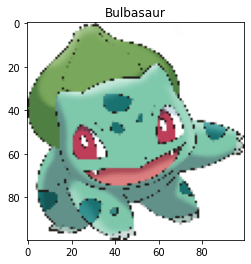

In [7]:
draw_img(X[0]/255.0, Y[0])

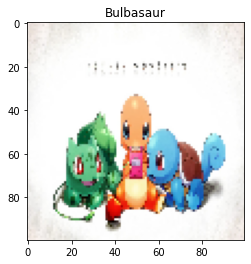

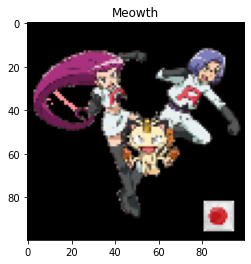

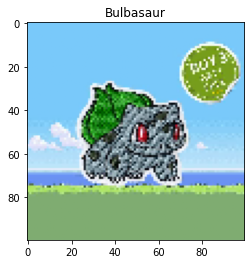

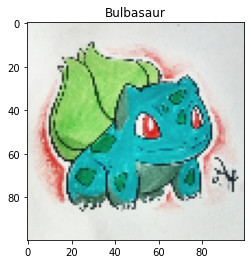

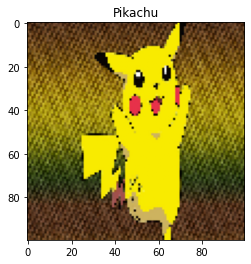

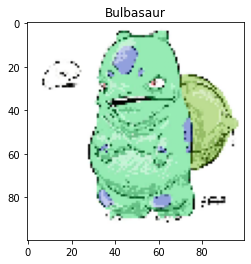

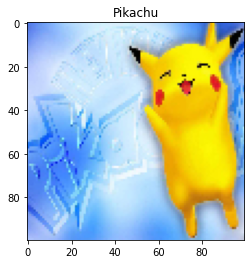

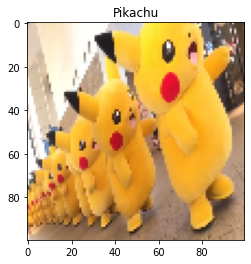

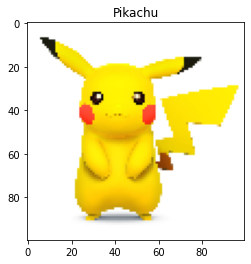

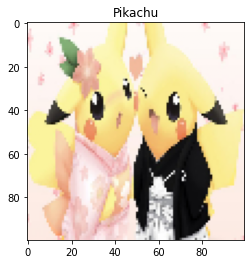

In [8]:
for _ in range(10):
    rand_idx = np.random.randint(X.shape[0])
    draw_img(X[rand_idx]/255.0, Y[rand_idx])

In [10]:
split = int(X.shape[0]*0.8)

In [11]:
X.shape, Y.shape

((445, 100, 100, 3), (445,))

In [12]:
X_Train, Y_Train, X_Test, Y_Test = X[:split, :], Y[:split], X[split:, :], Y[split:]

In [13]:
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((356, 100, 100, 3), (356,), (89, 100, 100, 3), (89,))